In [10]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sn
import matplotlib.pyplot as plt
import os
import numpy as np
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
directory_list = []
dirs = []
root = None

for root, dirs, files in os.walk("/content/drive/My Drive/Colab Notebooks/Transfer learning project/UCR_TS_Archive_2015/", topdown=False):
    for name in dirs:
        directory_list.append(files)

print(dirs) 


dataset_list = []
for dataset in dirs:
    dataset_list.append(dataset + "/" + dataset + "_TRAIN")


dataset_list[:5]

['BirdChicken', 'Adiac', 'CBF', 'CinC_ECG_torso', 'Car', 'BeetleFly', 'Beef', '50words', 'ChlorineConcentration', 'ArrowHead', 'Cricket_Y', 'Coffee', 'Earthquakes', 'Cricket_Z', 'DistalPhalanxOutlineAgeGroup', 'Cricket_X', 'Computers', 'DistalPhalanxOutlineCorrect', 'DiatomSizeReduction', 'DistalPhalanxTW', 'FaceFour', 'ElectricDevices', 'ECG200', 'FordB', 'FordA', 'ECGFiveDays', 'FacesUCR', 'FISH', 'FaceAll', 'ECG5000', 'Lighting2', 'InsectWingbeatSound', 'InlineSkate', 'HandOutlines', 'ItalyPowerDemand', 'Ham', 'Herring', 'LargeKitchenAppliances', 'Haptics', 'Gun_Point', 'NonInvasiveFatalECG_Thorax1', 'MiddlePhalanxOutlineCorrect', 'MoteStrain', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'MedicalImages', 'MALLAT', 'Meat', 'Lighting7', 'NonInvasiveFatalECG_Thorax2', 'ProximalPhalanxOutlineAgeGroup', 'Phoneme', 'OSULeaf', 'ScreenType', 'ProximalPhalanxOutlineCorrect', 'Plane', 'PhalangesOutlinesCorrect', 'ProximalPhalanxTW', 'OliveOil', 'RefrigerationDevices', 'StarLightCurves'

['BirdChicken/BirdChicken_TRAIN',
 'Adiac/Adiac_TRAIN',
 'CBF/CBF_TRAIN',
 'CinC_ECG_torso/CinC_ECG_torso_TRAIN',
 'Car/Car_TRAIN']

In [4]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Transfer learning project/UCR_TS_Archive_2015/')

In [83]:
data = []
data_dic = {}
for data_name in dataset_list:
  temp = read_csv(data_name, header=None)
  data.append(temp)
  data_dic[data_name.split("/")[0]] = temp

print(len(data))

85


In [84]:
data_dic.keys()

dict_keys(['BirdChicken', 'Adiac', 'CBF', 'CinC_ECG_torso', 'Car', 'BeetleFly', 'Beef', '50words', 'ChlorineConcentration', 'ArrowHead', 'Cricket_Y', 'Coffee', 'Earthquakes', 'Cricket_Z', 'DistalPhalanxOutlineAgeGroup', 'Cricket_X', 'Computers', 'DistalPhalanxOutlineCorrect', 'DiatomSizeReduction', 'DistalPhalanxTW', 'FaceFour', 'ElectricDevices', 'ECG200', 'FordB', 'FordA', 'ECGFiveDays', 'FacesUCR', 'FISH', 'FaceAll', 'ECG5000', 'Lighting2', 'InsectWingbeatSound', 'InlineSkate', 'HandOutlines', 'ItalyPowerDemand', 'Ham', 'Herring', 'LargeKitchenAppliances', 'Haptics', 'Gun_Point', 'NonInvasiveFatalECG_Thorax1', 'MiddlePhalanxOutlineCorrect', 'MoteStrain', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'MedicalImages', 'MALLAT', 'Meat', 'Lighting7', 'NonInvasiveFatalECG_Thorax2', 'ProximalPhalanxOutlineAgeGroup', 'Phoneme', 'OSULeaf', 'ScreenType', 'ProximalPhalanxOutlineCorrect', 'Plane', 'PhalangesOutlinesCorrect', 'ProximalPhalanxTW', 'OliveOil', 'RefrigerationDevices', 'StarLi

In [85]:
def pad_distance(ts1):
    # Compute the proxy series for each time series
    proxy = np.sum(np.abs(np.diff(np.array(ts1))))
    return proxy

for dt in data:
  dt["PAD"] = 0
  for i in range(1, dt.shape[0]):
    dt["PAD"].iloc[i] = pad_distance(dt.iloc[i:i+1, 1:]) 

data[0]["PAD"].head()

<ipython-input-85-a22695390ceb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["PAD"].iloc[i] = pad_distance(dt.iloc[i:i+1, 1:])
<ipython-input-85-a22695390ceb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["PAD"].iloc[i] = pad_distance(dt.iloc[i:i+1, 1:])
<ipython-input-85-a22695390ceb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt["PAD"].iloc[i] = pad_distance(dt.iloc[i:i+1, 1:])
<ipython-input-85-a22695390ceb>:9: Se

0     0.000000
1    17.842574
2    18.151384
3    19.126080
4    21.564768
Name: PAD, dtype: float64

In [86]:
i = 0
for key in data_dic.keys():
  data_dic[key] = data[i]
  i = i + 1

In [87]:
data_dic['BirdChicken']

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,PAD
0,1,1.76140,1.72940,1.67880,1.61460,1.52920,1.46530,1.409800,1.346200,1.29150,...,1.463400,1.525100,1.577300,1.60920,1.641500,1.695000,1.727900,1.73150,1.75670,0.000000
1,1,0.39157,0.36945,0.35484,0.33371,0.32090,0.30079,0.252900,0.205600,0.18685,...,-0.009835,0.040314,0.055801,0.10730,0.130370,0.188250,0.251780,0.31539,0.35023,17.842574
2,1,0.52484,0.50080,0.46619,0.44410,0.41249,0.39244,0.373240,0.309960,0.25605,...,0.104060,0.155920,0.193760,0.25755,0.295450,0.345690,0.383820,0.44764,0.48581,18.151384
3,1,1.65610,1.61910,1.56430,1.52820,1.46680,1.40210,1.359300,1.295700,1.23290,...,1.748800,1.707800,1.707000,1.68650,1.666700,1.687500,1.688500,1.68980,1.67260,19.126080
4,1,1.62560,1.63500,1.65570,1.66690,1.67860,1.69100,1.703900,1.731300,1.74590,...,1.233000,1.240700,1.300300,1.35170,1.403000,1.411700,1.462900,1.52320,1.57440,21.564768
5,1,1.77900,1.73140,1.68400,1.58980,1.54300,1.49650,1.463400,1.430800,1.39870,...,1.799400,1.826900,1.854800,1.80520,1.755800,1.784800,1.765700,1.79600,1.74790,22.436848
6,1,1.76420,1.72100,1.67500,1.64270,1.62180,1.62040,1.589600,1.548100,1.51820,...,1.865200,1.845200,1.844400,1.83660,1.836700,1.829600,1.822900,1.82440,1.79960,18.642302
7,1,1.44630,1.42790,1.37360,1.35580,1.29110,1.26770,1.221200,1.175000,1.12910,...,1.463700,1.464700,1.466100,1.46800,1.470200,1.472900,1.476000,1.47950,1.46070,16.940968
8,1,1.56850,1.53040,1.49280,1.46900,1.40280,1.35560,1.308800,1.262300,1.21620,...,1.568800,1.569200,1.570100,1.57130,1.573000,1.575100,1.577600,1.60350,1.58390,17.340388
9,1,1.51340,1.46790,1.42290,1.37840,1.33320,1.28790,1.241900,1.196400,1.15140,...,1.557200,1.552900,1.549100,1.54580,1.543000,1.540600,1.538700,1.53730,1.51410,18.171978


In [88]:
def PAD_distance_matrix(dt1, dt2):
  dis = np.zeros((dt1.shape[0], dt2.shape[0]))

  for i in range(dt1.shape[0]):
    for j in range(dt2.shape[0]):
      dis[i][j] = np.sqrt((dt1["PAD"].iloc[i] - dt2["PAD"].iloc[j]) ** 2)

  return dis 

# example:
dis01 = PAD_distance_matrix(data[0], data[1])
print(dis01.mean())

8.565052610717947


In [89]:
def new_dataframe(dl):
  d = {"index_title": dl[0]}
  dis_matrix_all = pd.DataFrame(d).set_index("index_title")

  for name in dl[0]:
      dis_matrix_all[name] = 0
    
  i = 0
  x = len(dl[1])
  check = np.zeros(shape=(x, x))
  for data1 in tqdm(dl[1], leave=False):
      j = 0
      for data2 in tqdm(dl[1], leave=False):
        if check[i][j] == 0 or check[j][i] == 0:
          if j < x:
              dis_matrix_all.iloc[i:i+1, j:j+1] = PAD_distance_matrix(data1, data2).mean()  
              check[i][j] = 1
              check[j][i] = 1
          else:
              break    
        else:
          pass     
        j = j + 1    
      i = i + 1   

  return dis_matrix_all    

In [37]:
# The heatmap for the below data is upper traingle (for faster computation)

In [90]:
# random.shuffle(data)

# dl = random_data(data, 20)
dl = (list(data_dic.keys())[:21], list(data_dic.values())[:21])
MAT = new_dataframe(dl)

  0%|          | 0/21 [00:00<?, ?it/s]
                                      
  0%|          | 0/21 [00:00<?, ?it/s]


<Axes: ylabel='index_title'>

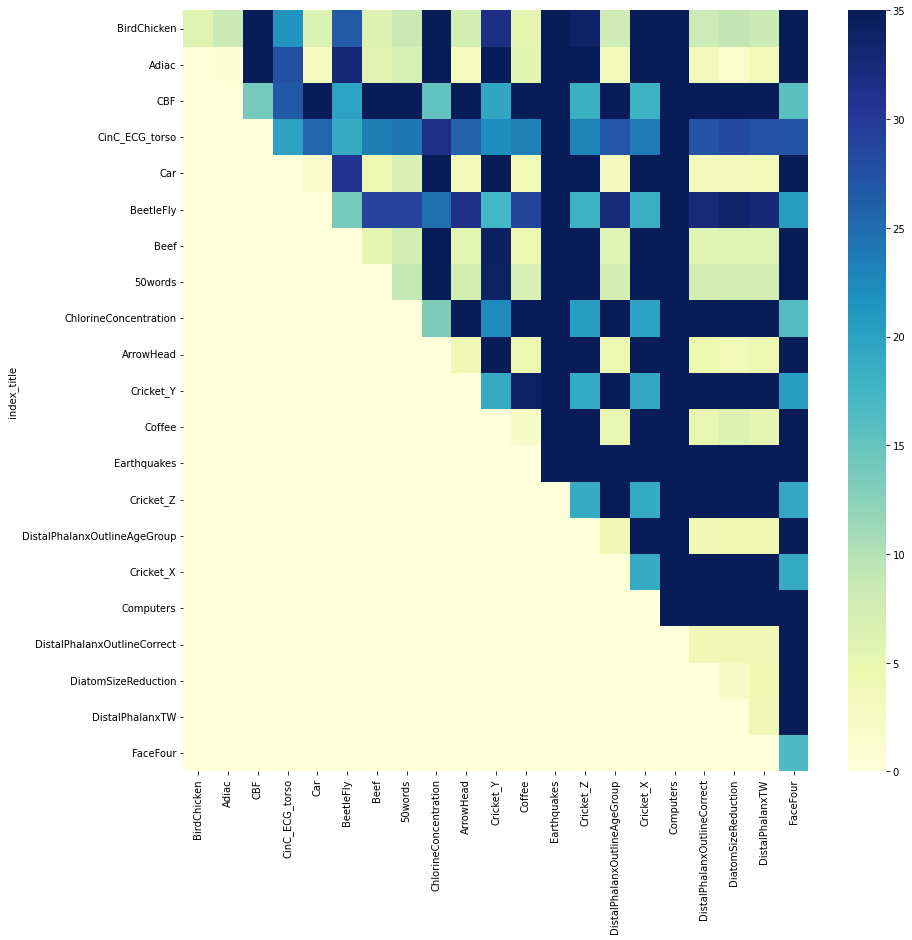

In [91]:
fig, ax = plt.subplots(figsize=(14,14)) 
sn.heatmap(MAT, cmap="YlGnBu", vmax=35,vmin=0)

100%|██████████| 20/20 [00:02<00:00,  9.05it/s]


<Axes: ylabel='index_title'>

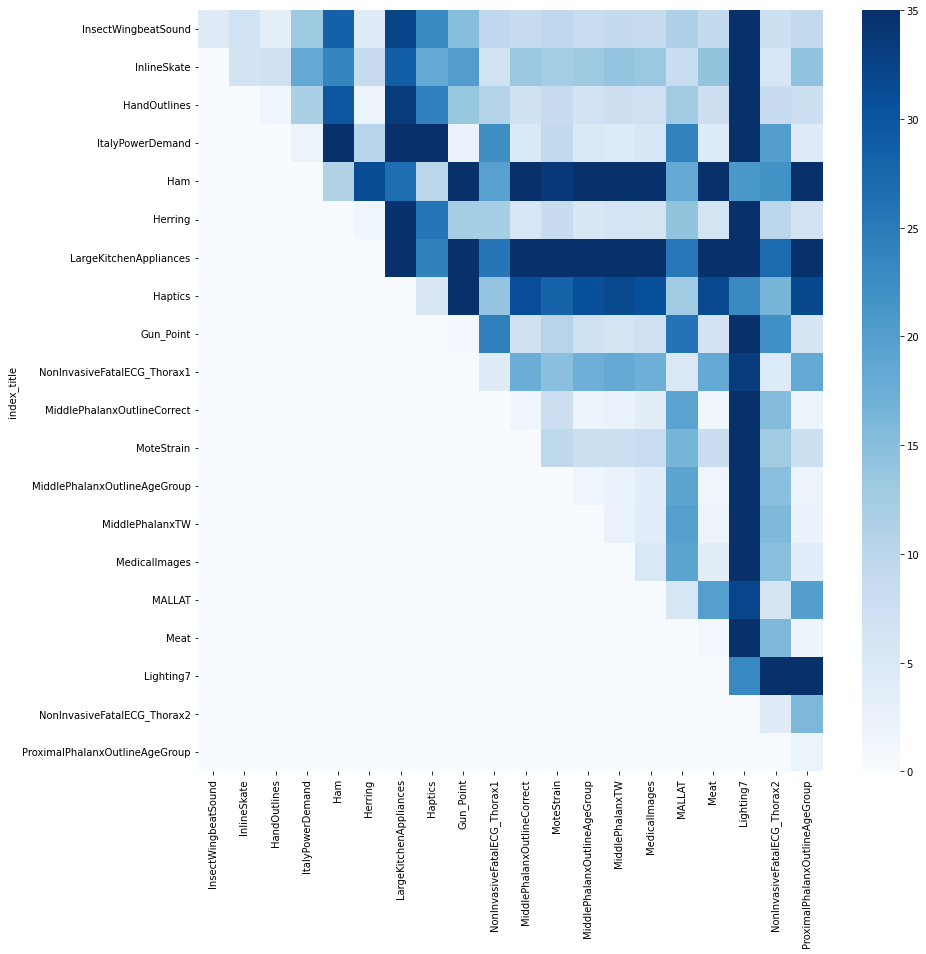

In [92]:
dl1 = (list(data_dic.keys())[31:51], list(data_dic.values())[31:51])
MAT1 = new_dataframe(dl1)

fig, ax = plt.subplots(figsize=(14,14)) 
sn.heatmap(MAT1, cmap="Blues", vmax=35,vmin=0)

  0%|          | 0/21 [00:00<?, ?it/s]
                                      
  0%|          | 0/21 [00:00<?, ?it/s]


<Axes: ylabel='index_title'>

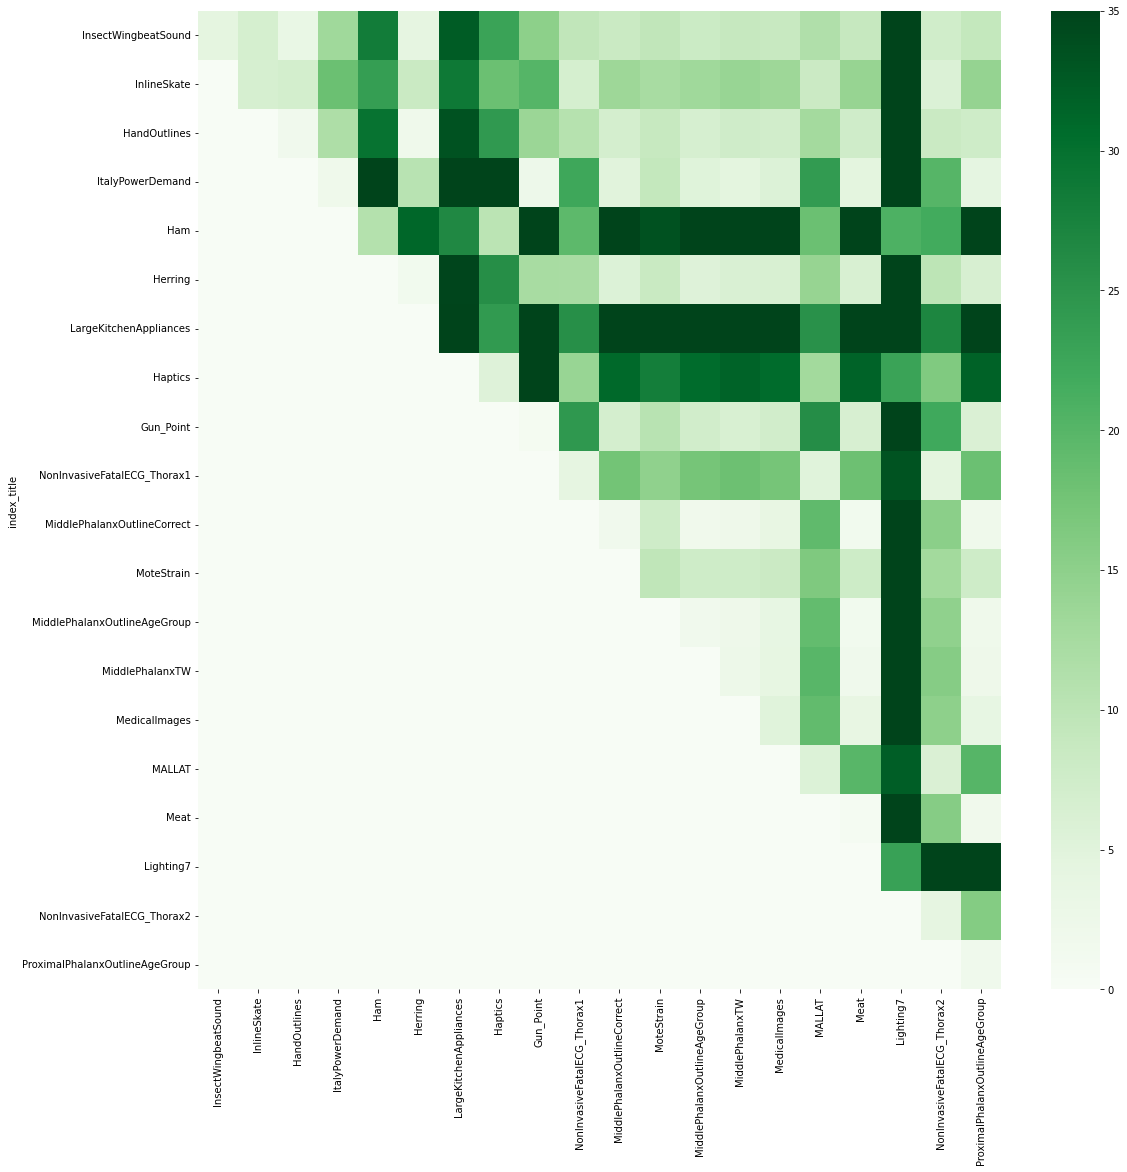

In [93]:
dl2 = (list(data_dic.keys())[29:69], list(data_dic.values())[29:69])
MAT2 = new_dataframe(dl)

fig, ax = plt.subplots(figsize=(18,18)) 
sn.heatmap(MAT1, cmap="Greens", vmax=35,vmin=0)